# Author - Anurag Vashisht
# Project - Forecast hourly bike rental demand 
# Problem Statement - In this project, we are asked to combine historical usage patterns with weather data in order to forecast hourly bike rental demand

In [78]:
#importing files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
import calendar
import seaborn as sn
%matplotlib inline

In [79]:
train=pd.read_csv("train1.csv")
test=pd.read_csv("test.csv")

In [80]:
train.shape , test.shape

((12980, 12), (4399, 11))

In [81]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1/1/2011 0:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1/1/2011 1:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,1/1/2011 2:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,1/1/2011 3:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,1/1/2011 4:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [82]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [83]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered'],
      dtype='object')

In [84]:
#data types of columns
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

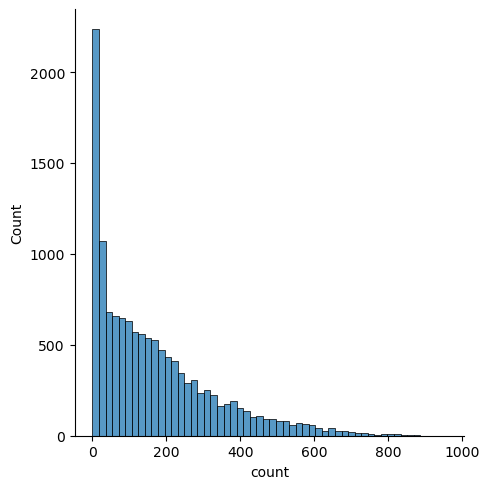

In [85]:
sn.displot(train["count"])

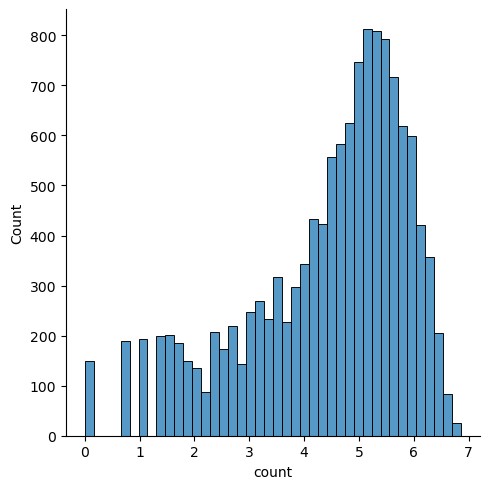

In [86]:
sn.displot(np.log(train["count"]))

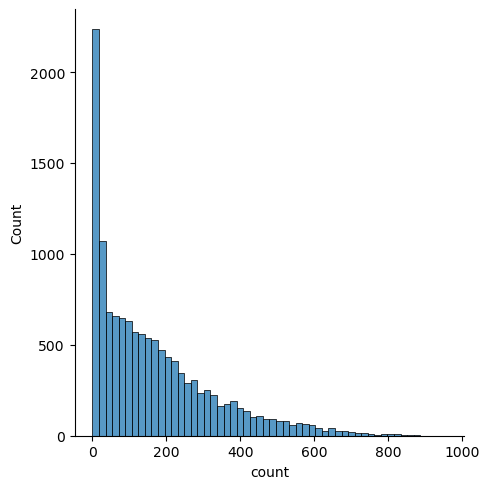

In [87]:
sn.displot(train["count"])

In [88]:
train[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()


,temp,atemp,casual,registered,humidity,windspeed,count
temp,1.000000,0.991839,0.459414,0.344451,-0.048478,-0.008669,0.415938
atemp,0.991839,1.000000,0.454015,0.342345,-0.031606,-0.049997,0.412644
casual,0.459414,0.454015,1.000000,0.509175,-0.320253,0.079524,0.707938
registered,0.344451,0.342345,0.509175,1.000000,-0.279501,0.100579,0.968329
humidity,-0.048478,-0.031606,-0.320253,-0.279501,1.000000,-0.296975,-0.322269
windspeed,-0.008669,-0.049997,0.079524,0.100579,-0.296975,1.000000,0.105607
count,0.415938,0.412644,0.707938,0.968329,-0.322269,0.105607,1.000000


In [89]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [90]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
dtype: int64

In [91]:
train["datetime"]=pd.to_datetime(train["datetime"])
train["date"]=train.datetime.dt.date
train["year"]=train.datetime.dt.year
train["month"]=train.datetime.dt.month
train["day"]=train.datetime.dt.day
train["hour"]=train.datetime.dt.hour
train["minute"]=train.datetime.dt.minute
train["seconds"]=train.datetime.dt.second


In [92]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,seconds
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,1,1,4,0,0


In [93]:
test["datetime"]=pd.to_datetime(test["datetime"])
test["date"]=test.datetime.dt.date
test["year"]=test.datetime.dt.year
test["month"]=test.datetime.dt.month
test["day"]=test.datetime.dt.day
test["hour"]=test.datetime.dt.hour
test["minute"]=test.datetime.dt.minute
test["seconds"]=test.datetime.dt.second


In [94]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,date,year,month,day,hour,minute,seconds
0,2012-06-30 01:00:00,3,0,0,3,26.24,28.790,89.0,15.0013,3,55,2012-06-30,2012,6,30,1,0,0
1,2012-06-30 02:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,7,54,2012-06-30,2012,6,30,2,0,0
2,2012-06-30 03:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,3,20,2012-06-30,2012,6,30,3,0,0
3,2012-06-30 04:00:00,3,0,0,2,25.42,27.275,94.0,0.0000,3,15,2012-06-30,2012,6,30,4,0,0
4,2012-06-30 05:00:00,3,0,0,1,26.24,28.790,89.0,11.0014,3,7,2012-06-30,2012,6,30,5,0,0


In [95]:
training = train[train['datetime']<='2012-03-30 0:00:00']
validation = train[train['datetime']>'2012-03-30 0:00:00']

In [96]:
train=train.drop(["datetime","date","atemp"],axis=1)
test=test.drop(["datetime","date","atemp"],axis=1)
training=training.drop(["datetime","date","atemp"],axis=1)
validation=validation.drop(["datetime","date","atemp"],axis=1)

# Linear Regresssion

In [97]:
from sklearn.linear_model import LinearRegression

In [98]:
lreg=LinearRegression()

In [99]:
x_train = training.drop('count', 1)
y_train = np.log(training['count'])
x_val = validation.drop('count', 1)
y_val = np.log(validation['count'])

C:\Users\asus\AppData\Local\Temp\ipykernel_10172\2901404279.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_train = training.drop('count', 1)
C:\Users\asus\AppData\Local\Temp\ipykernel_10172\2901404279.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_val = validation.drop('count', 1)


In [100]:
y_val.head()

10774    3.295837
10775    1.945910
10776    1.945910
10777    0.693147
10778    3.258097
Name: count, dtype: float64

In [101]:
lreg.fit(x_train,y_train)

LinearRegression()

In [102]:
predict=lreg.predict(x_val)
predict

array([2.84315107, 2.74865408, 2.74833811, ..., 5.33334827, 4.62535463,
       3.32563131])

In [103]:
lreg1=lreg.score(x_val,y_val)
lreg2=lreg.score(x_train,y_train)

In [104]:
lreg1

0.5996056615361077

In [105]:
lreg2

0.7334896739426251

In [106]:
def rmsle(y, y_):
    y = np.exp(y),   # taking the exponential as we took the log of target variable
    y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [107]:
rmsle(y_val,predict)

0.8967767360758441

# Decision Tree

In [134]:
from sklearn.tree import DecisionTreeRegressor

In [135]:
dtree=DecisionTreeRegressor(max_depth=5)

In [136]:
dtree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [137]:
pre=dtree.predict(x_val)

In [138]:
rmsle(y_val,pre)

0.17102267399446885

In [139]:
test_prediction = dtree.predict(test)

In [140]:
final_prediction = np.exp(test_prediction)

In [141]:
submission = pd.DataFrame()

In [142]:
submission['count'] = final_prediction

In [143]:
submission.to_csv('submission1.csv', header=True, index=False)

In [144]:
test_prediction

array([4.20971721, 4.20971721, 3.10092477, ..., 4.54557822, 4.07653276,
       4.07653276])

In [145]:
pre

array([3.41871062, 1.8467692 , 1.8467692 , ..., 5.11768502, 3.82939259,
       4.20971721])